# import python packages

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns

# list parquet files

In [2]:
parquet_files = []

for file in os.listdir('../Output_SWMM_directory/'):
    if file.endswith('.parquet'):
        parquet_files.append(file)

parquet_files = pd.DataFrame(parquet_files, columns=['parquet_filename'])
parquet_files.sort_values(by='parquet_filename', inplace=True, ignore_index=True)
parquet_files

,parquet_filename
0,frequent______freq_0_2_EY___________010__01.pa...
1,frequent______freq_0_2_EY___________010__02.pa...
2,frequent______freq_0_2_EY___________010__03.pa...
3,frequent______freq_0_2_EY___________010__04.pa...
4,frequent______freq_0_2_EY___________010__05.pa...
...,...
805,rare__________freq_2_percentage_____120__06.pa...
806,rare__________freq_2_percentage_____120__07.pa...
807,rare__________freq_2_percentage_____120__08.pa...
808,rare__________freq_2_percentage_____120__09.pa...


# read parquet files

In [3]:
hydrograph_list = []

for index_1 in parquet_files.index:
    a1 = parquet_files.parquet_filename[index_1]
    a2 = pd.read_parquet('../Output_SWMM_directory/' + a1)
    a3 = pd.DataFrame({'frequency':[a1[:-8][:14].split('__')[0]], 
                       'freq_AEP':[a1[:-8][14:-7].split('__')[0]], 
                       'duration':[int(a1[:-8][-7:-4])], 
                       'pattern':[int(a1[:-8][-2:])], 
                       'hydrograph':[a2]})
    hydrograph_list.append(a3)

hydrograph_list = pd.concat(hydrograph_list, ignore_index=True)
hydrograph_list

,frequency,freq_AEP,duration,pattern,hydrograph
0,frequent,freq_0_2_EY,10,1,timestamp flow 0 2023-01...
1,frequent,freq_0_2_EY,10,2,timestamp flow 0 2023-01...
2,frequent,freq_0_2_EY,10,3,timestamp flow 0 2023-01...
3,frequent,freq_0_2_EY,10,4,timestamp flow 0 2023-01...
4,frequent,freq_0_2_EY,10,5,timestamp flow 0 2023-01...
...,...,...,...,...,...
805,rare,freq_2_percentage,120,6,timestamp flow 0 2023-01-...
806,rare,freq_2_percentage,120,7,timestamp flow 0 2023-01-...
807,rare,freq_2_percentage,120,8,timestamp flow 0 2023-01...
808,rare,freq_2_percentage,120,9,timestamp flow 0 2023-01-...


# get peak flow for each hydrograph

In [189]:
max_flow_list = []

for index_2 in hydrograph_list.index:
    b1 = hydrograph_list.hydrograph[index_2].flow.max()
    max_flow_list.append(b1)

max_flow_list = pd.DataFrame({'max_flow':max_flow_list})
max_flow_list = pd.concat([hydrograph_list.iloc[:,:4], max_flow_list], axis=1)
max_flow_list

,frequency,freq_AEP,duration,pattern,max_flow
0,frequent,freq_0_2_EY,10,1,14.064574
1,frequent,freq_0_2_EY,10,2,14.360415
2,frequent,freq_0_2_EY,10,3,13.859452
3,frequent,freq_0_2_EY,10,4,14.387873
4,frequent,freq_0_2_EY,10,5,14.211152
...,...,...,...,...,...
805,rare,freq_2_percentage,120,6,15.925628
806,rare,freq_2_percentage,120,7,9.787742
807,rare,freq_2_percentage,120,8,15.020906
808,rare,freq_2_percentage,120,9,12.388422


# statistics

In [554]:
statistics = max_flow_list.groupby(by=max_flow_list.columns[:3].to_list()).agg({'max_flow':['describe']})
statistics

max_flow                                  \
                                     describe                                   
                                        count       mean       std        min   
frequency freq_AEP          duration                                            
frequent  freq_0_2_EY       10           10.0  14.409101  0.319253  13.859452   
                            15           10.0  15.853758  0.482017  14.875977   
                            20           10.0  15.792678  0.911690  14.507990   
                            25           10.0  15.151653  1.031341  13.425577   
                            30           10.0  14.986001  1.130143  12.908811   
...                                       ...        ...       ...        ...   
rare      freq_2_percentage 30           10.0  18.465048  0.915233  16.856841   
                            45           10.0  17.425531  1.016981  15.370186   
                            60           10.0  16.467129  1.945846  13.508335   
                            90           10.0  14.787992  2.730643  11.018052   
                            120          10.0  14.681157  2.896514   9.787742   

                                                                       \
                                                                        
                                            25%        50%        75%   
frequency freq_AEP          duration                                    
frequent  freq_0_2_EY       10        14.248467  14.414546  14.522274   
                            15        15.868283  15.980652  16.076996   
                            20        15.052340  15.923456  16.414486   
                            25        14.643342  15.439248  16.027961   
                            30        14.414444  14.785836  15.926431   
...                                         ...        ...        ...   
rare      freq_2_percentage 30        17.990769  18.725321  19.170542   
                            45        16.823263  17.750378  18.184214   
                            60        14.922466  16.568853  17.706261   
                            90        13.084906  14.623182  16.464847   
                            120       12.824861  15.304595  15.972996   

                                                 
                                                 
                                            max  
frequency freq_AEP          duration             
frequent  freq_0_2_EY       10        14.941526  
                            15        16.437045  
                            20        17.294208  
                            25        16.137153  
                            30        16.633668  
...                                         ...  
rare      freq_2_percentage 30        19.495519  
                            45        18.462837  
                            60        19.966546  
                            90        19.794118  
                            120       18.984130  

[81 rows x 8 columns]

In [562]:
statistics.loc['frequent','freq_0_2_EY'].T

duration                       10         15         20         25   \
max_flow describe count  10.000000  10.000000  10.000000  10.000000   
                  mean   14.409101  15.853758  15.792678  15.151653   
                  std     0.319253   0.482017   0.911690   1.031341   
                  min    13.859452  14.875977  14.507990  13.425577   
                  25%    14.248467  15.868283  15.052340  14.643342   
                  50%    14.414546  15.980652  15.923456  15.439248   
                  75%    14.522274  16.076996  16.414486  16.027961   
                  max    14.941526  16.437045  17.294208  16.137153   

duration                       30         45         60         90         120  
max_flow describe count  10.000000  10.000000  10.000000  10.000000  10.000000  
                  mean   14.986001  15.041120  12.719237  10.638932  10.794070  
                  std     1.130143   1.083096   2.257819   2.464843   2.751545  
                  min    12.908811  13.483744   9.430740   7.476431   7.782621  
                  25%    14.414444  14.361492  11.355384   8.598229   8.513497  
                  50%    14.785836  14.965373  12.360285  10.557450  10.358530  
                  75%    15.926431  15.857645  14.870427  12.398723  12.567664  
                  max    16.633668  16.549569  15.771910  14.693831  15.808351

# plot

In [564]:
freq_titles = max_flow_list.frequency.drop_duplicates().to_list()
freq_titles

['frequent', 'intermediate', 'rare']

In [555]:
aep_titles = max_flow_list.freq_AEP.drop_duplicates().to_list()
aep_titles

['freq_0_2_EY',
 'freq_0_5_EY',
 'freq_20_percentage',
 'freq_50_percentage',
 'freq_63_2_percentage',
 'freq_10_percentage',
 'freq_5_percentage',
 'freq_1_percentage',
 'freq_2_percentage']

In [ ]:
for index_3 in range(len(freq_titles)):
    c1 = aep_titles[index_3]
    c2 = max_flow_list[max_flow_list.freq_AEP == c1]
    plt.figure()
    sns.boxplot(data=c2,
            x='duration',
            y='max_flow').set(title=c1)
    plt.table()

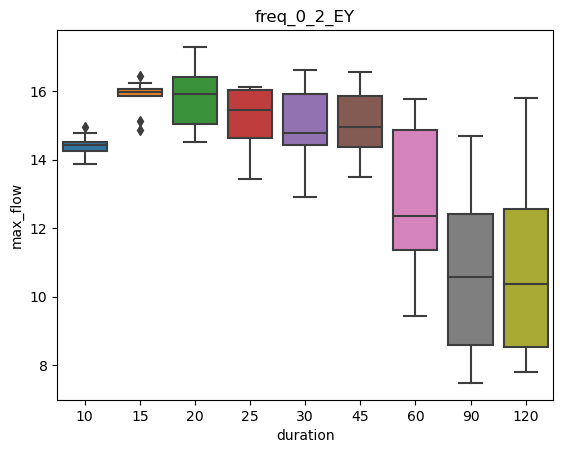

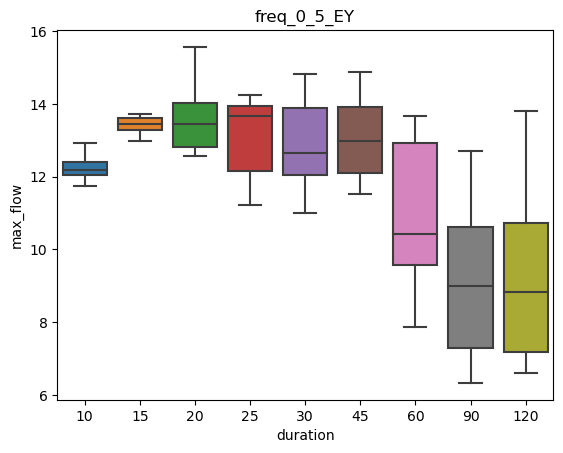

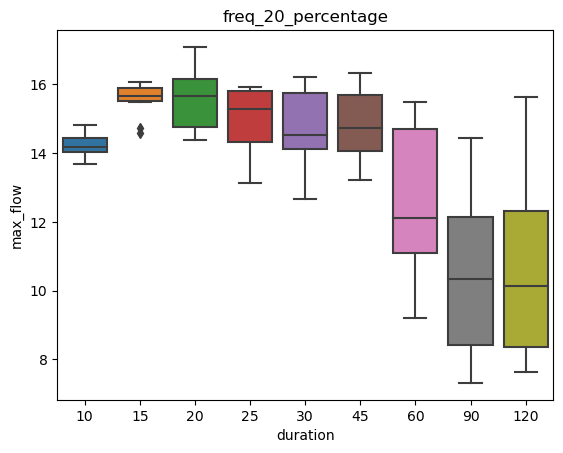

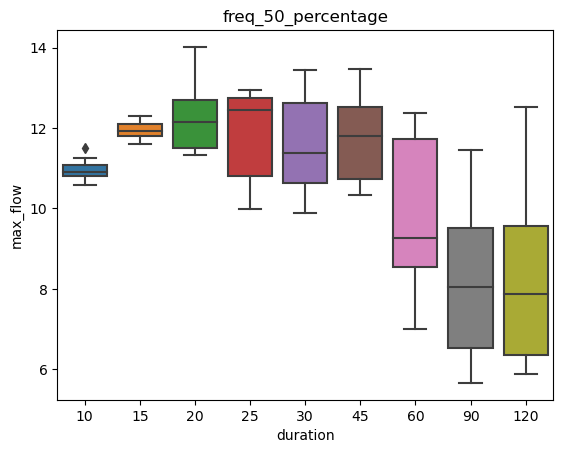

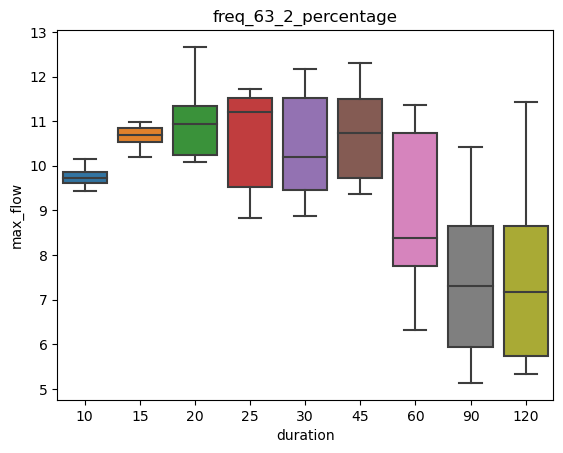

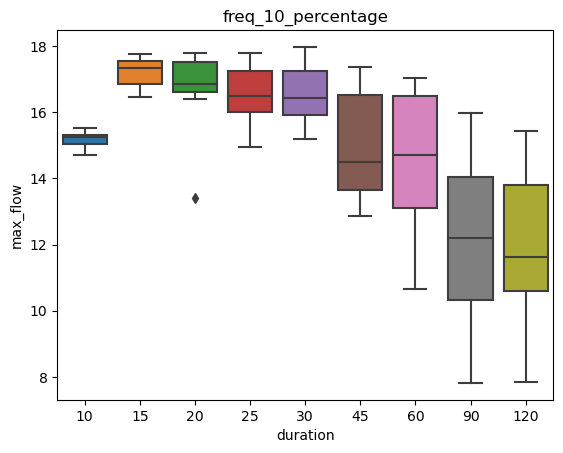

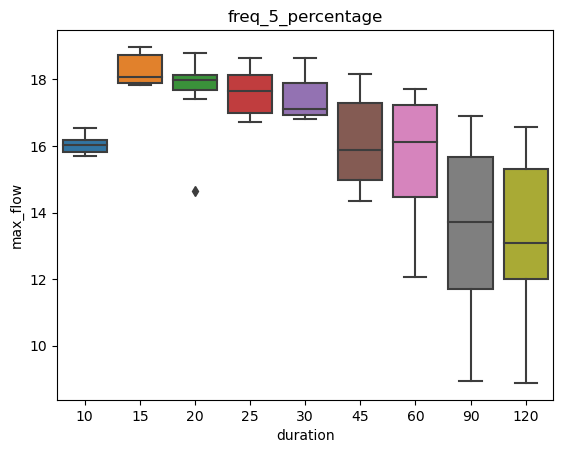

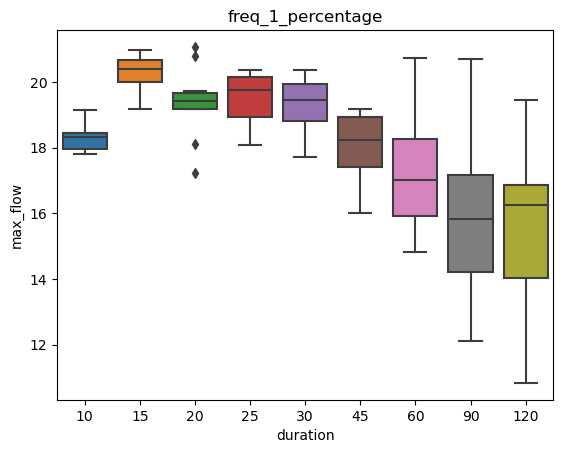

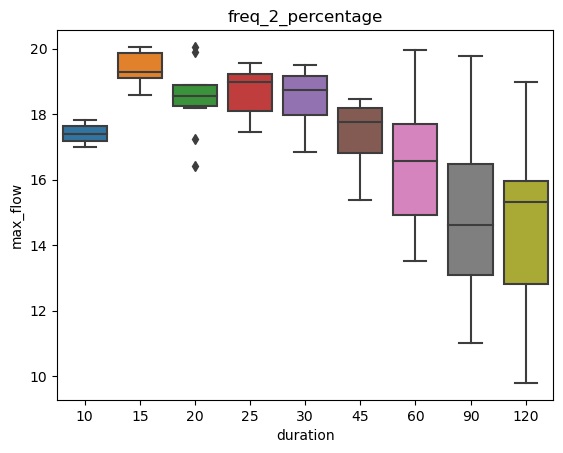

In [556]:
for index_3 in range(len(aep_titles)):
    c1 = aep_titles[index_3]
    c2 = max_flow_list[max_flow_list.freq_AEP == c1]
    plt.figure()
    sns.boxplot(data=c2,
            x='duration',
            y='max_flow').set(title=c1)

In [ ]:
g = sns.FacetGrid(max_flow_list, row='freq_AEP', height=5, aspect=2)
g.map(sns.boxplot, 'duration', 'max_flow')

[Text(0.5, 1.0, 'freq_0_2_EY')]

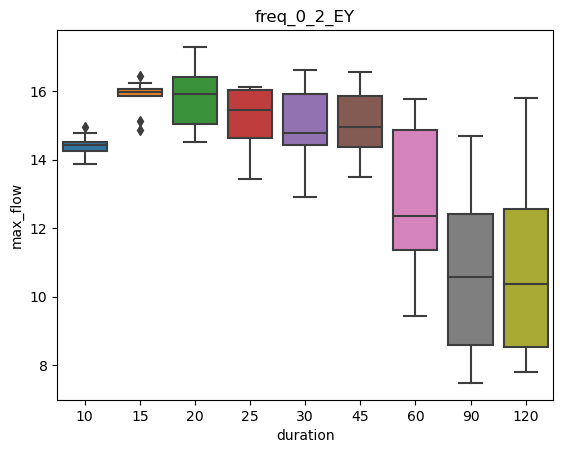

In [517]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_0_2_EY'],
            x='duration',
            y='max_flow').set(title='freq_0_2_EY')

[Text(0.5, 1.0, 'freq_0_5_EY')]

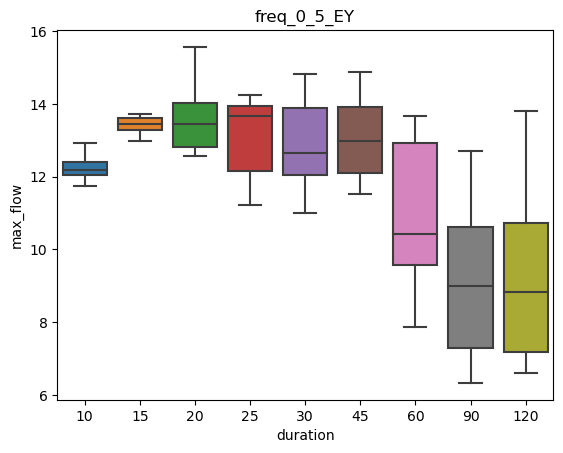

In [518]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_0_5_EY'],
            x='duration',
            y='max_flow').set(title='freq_0_5_EY')

[Text(0.5, 1.0, 'freq_20_percentage')]

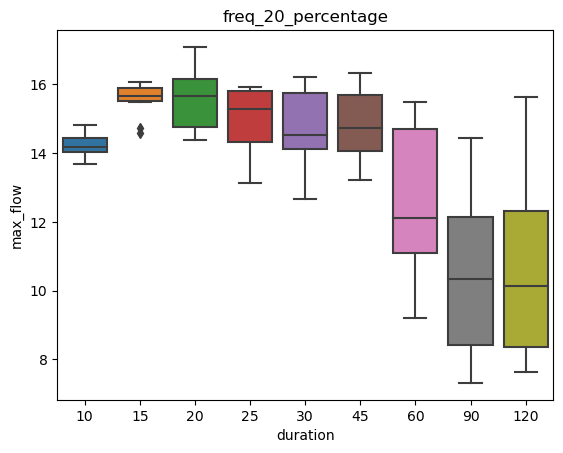

In [519]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_20_percentage'],
            x='duration',
            y='max_flow').set(title='freq_20_percentage')

[Text(0.5, 1.0, 'freq_50_percentage')]

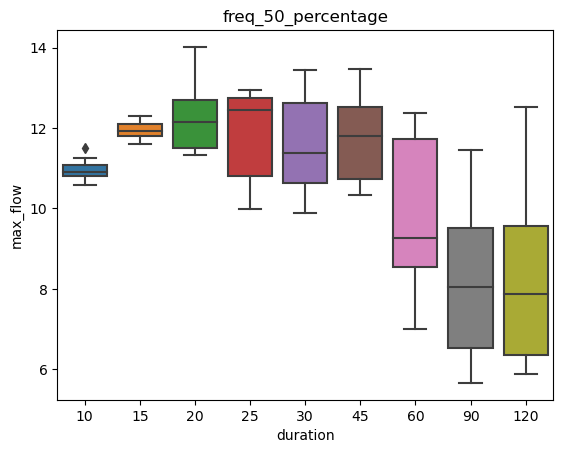

In [520]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_50_percentage'],
            x='duration',
            y='max_flow').set(title='freq_50_percentage')

[Text(0.5, 1.0, 'freq_63_2_percentage')]

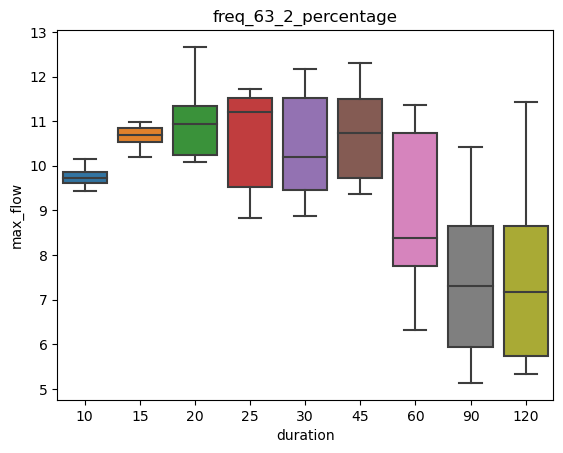

In [521]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_63_2_percentage'],
            x='duration',
            y='max_flow').set(title='freq_63_2_percentage')

[Text(0.5, 1.0, 'freq_10_percentage')]

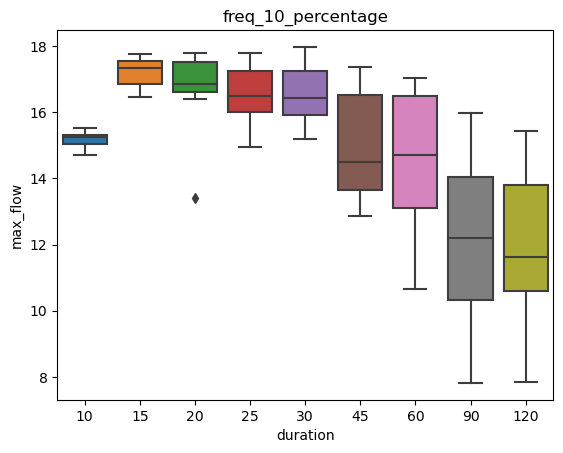

In [522]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_10_percentage'],
            x='duration',
            y='max_flow').set(title='freq_10_percentage')

[Text(0.5, 1.0, 'freq_5_percentage')]

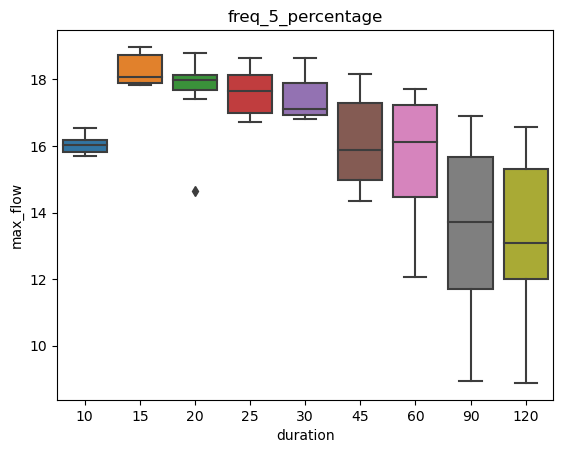

In [523]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_5_percentage'],
            x='duration',
            y='max_flow').set(title='freq_5_percentage')

[Text(0.5, 1.0, 'freq_2_percentage')]

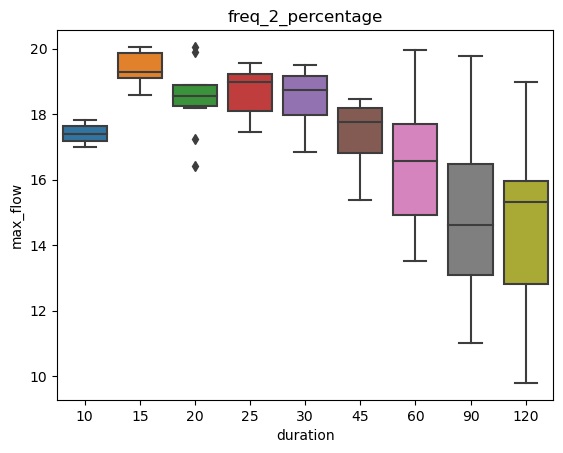

In [524]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_2_percentage'],
            x='duration',
            y='max_flow').set(title='freq_2_percentage')

[Text(0.5, 1.0, 'freq_1_percentage')]

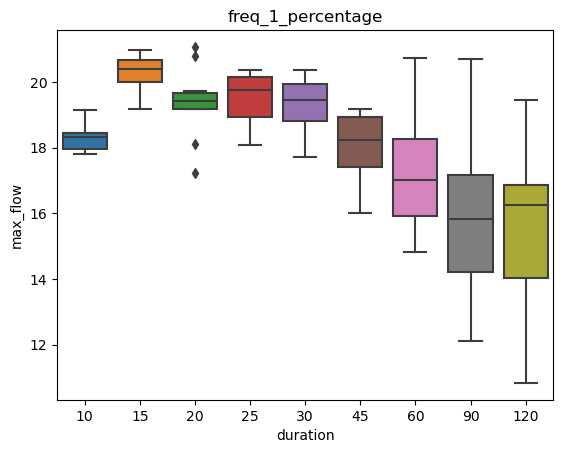

In [525]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_1_percentage'],
            x='duration',
            y='max_flow').set(title='freq_1_percentage')

c:\Users\HOLGER\.conda\envs\test_env\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\HOLGER\.conda\envs\test_env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\HOLGER\.conda\envs\test_env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\HOLGER\.conda\envs\test_env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\HOLGER\.conda\envs\test_env\lib\site-packages\seaborn\axisgrid.py:745: FutureWarnin

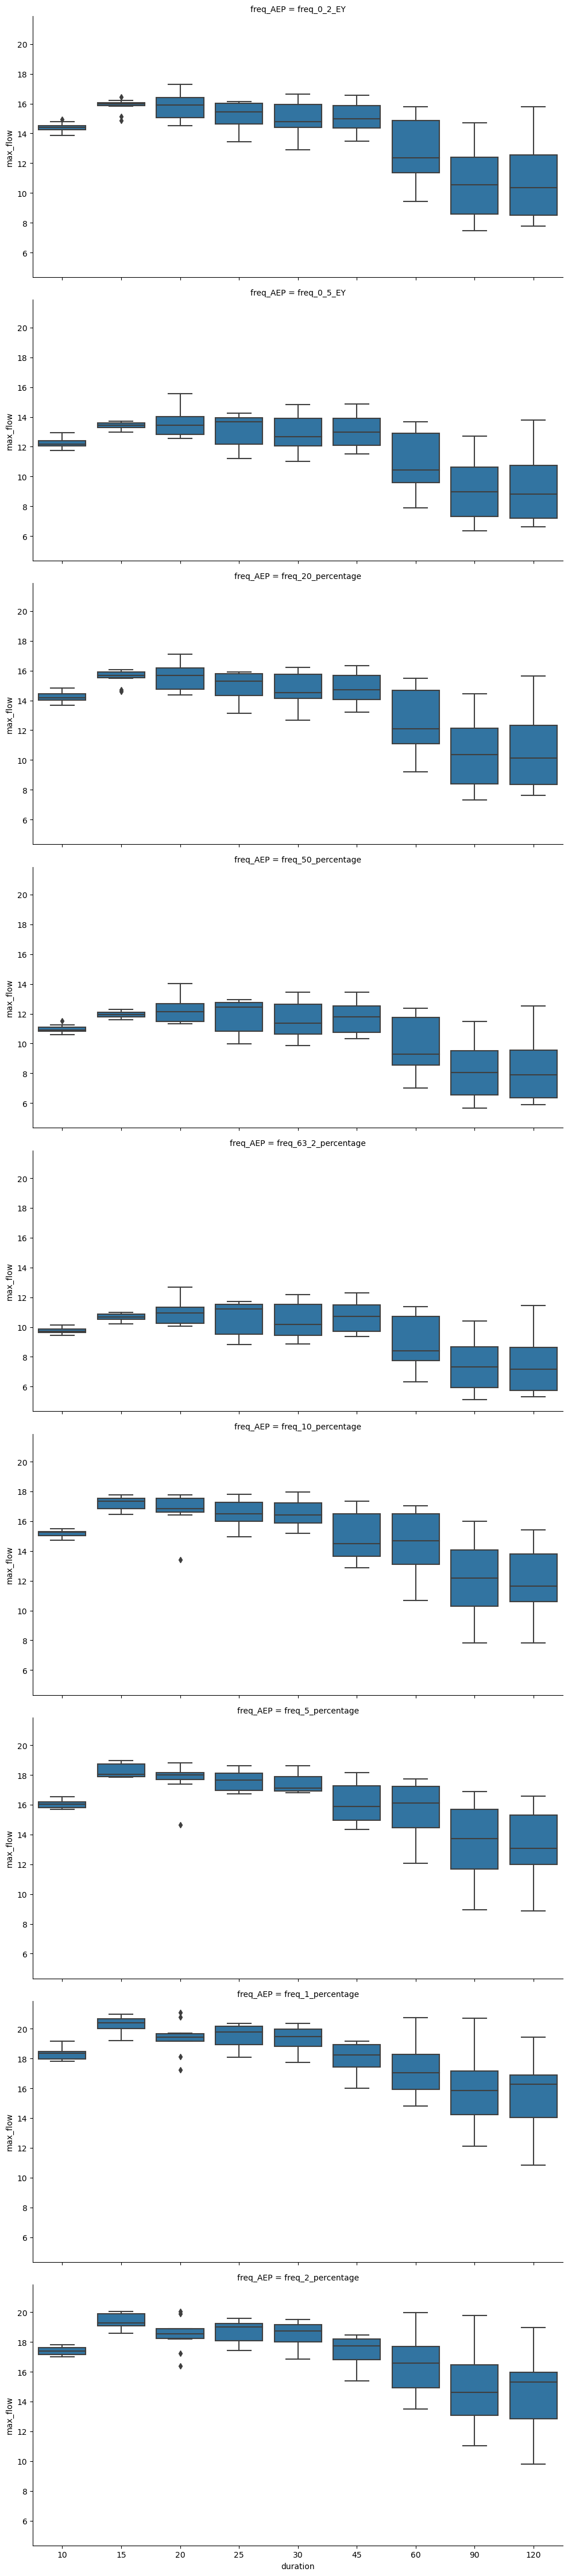

In [533]:
g = sns.FacetGrid(max_flow_list, row='freq_AEP', height=5, aspect=2)
g.map(sns.boxplot, 'duration', 'max_flow')

[Text(0.5, 1.0, 'freq_0_2_EY')]

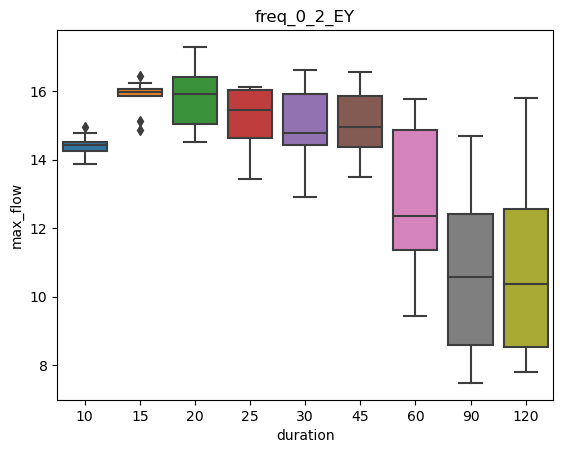

In [513]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_0_2_EY'],
            x='duration',
            y='max_flow').set(title='freq_0_2_EY')

In [510]:
for index_3 in range(len(aep_titles)):
    c1 = data=max_flow_list[max_flow_list.freq_AEP == aep_titles[index_3]]
    c2 = sns.FacetGrid()

    map(sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == aep_titles[index_3]], 
                x='duration', 
                y='max_flow').set(title=aep_titles[index_3]))

AttributeError: 'DataFrame' object has no attribute 'map'

[Text(0.5, 1.0, 'freq_0_2_EY')]

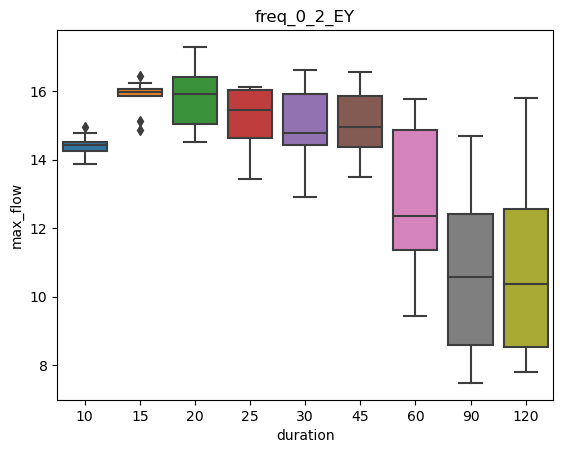

In [503]:
sns.boxplot(data=max_flow_list[max_flow_list.freq_AEP == 'freq_0_2_EY'],
            x='duration',
            y='max_flow').set(title='freq_0_2_EY')

In [215]:
groupby_AEP_duration = list(max_flow_list.groupby(by=max_flow_list.columns[:-2].to_list()))
groupby_AEP_duration;

In [216]:
box_plot_list = []

for index_3 in range(len(groupby_AEP_duration)):
    c1 = list(groupby_AEP_duration[index_3][0])
    c2 = groupby_AEP_duration[index_3][1].max_flow.to_list()
    c3 = pd.DataFrame(data=[c1 + c2], columns=['frequency', 'AEP', 'duration'] + ['pattern_{:02}'.format(ind + 1) for ind in range(10)])
    box_plot_list.append(c3)

box_plot_list = pd.concat(box_plot_list, ignore_index=True)
box_plot_list

,frequency,AEP,duration,pattern_01,pattern_02,pattern_03,pattern_04,pattern_05,pattern_06,pattern_07,pattern_08,pattern_09,pattern_10
0,frequent,freq_0_2_EY,10,14.064574,14.360415,13.859452,14.387873,14.211152,14.792106,14.528202,14.441220,14.941526,14.504489
1,frequent,freq_0_2_EY,15,16.089897,16.437045,16.226830,15.847293,16.021033,15.931251,15.940270,16.038293,15.129693,14.875977
2,frequent,freq_0_2_EY,20,16.419030,14.931500,15.414863,16.419060,16.400853,14.692369,17.294208,15.541497,16.305416,14.507990
3,frequent,freq_0_2_EY,25,14.763213,13.425577,14.603385,16.047263,16.032938,16.137153,15.842321,13.615477,16.013028,15.036174
4,frequent,freq_0_2_EY,30,14.423168,14.411536,14.057088,16.037182,15.944419,16.633668,12.908811,14.967936,15.872467,14.603736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,rare,freq_2_percentage,30,19.276443,17.914560,18.937634,19.084499,18.513008,16.856841,19.495519,17.153353,18.219395,19.199223
77,rare,freq_2_percentage,45,18.043021,18.378498,18.462837,18.184560,16.798611,16.479471,15.370186,16.897219,17.457735,18.183173
78,rare,freq_2_percentage,60,19.966546,14.500198,17.221222,16.189271,17.915158,16.745933,13.508335,16.391774,14.364912,17.867941
79,rare,freq_2_percentage,90,15.388619,16.340368,13.645855,11.412525,11.018052,17.018379,19.794118,16.506340,12.897923,13.857745


<AxesSubplot: xlabel='duration'>

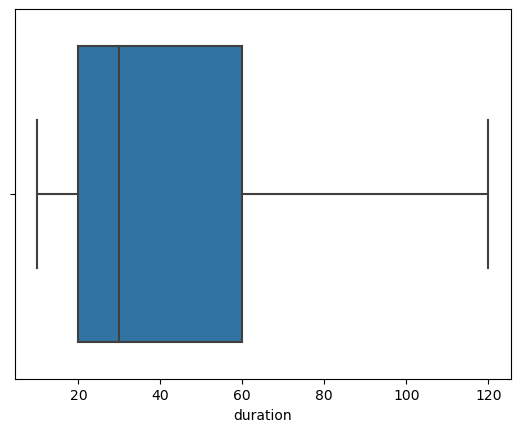

In [472]:
sns.boxplot(data=box_plot_list,
            x='duration',
            # y='AEP',
            hue='AEP'
            )

# plot box-plot

In [454]:
plotting = list(box_plot_list.groupby(by=box_plot_list.columns[:2].to_list()))
plotting;

In [455]:
index_4 = 0

In [456]:
d1 = plotting[index_4][0]
d1

('frequent', 'freq_0_2_EY')

In [457]:
d2 = plotting[index_4][1]
d2.drop(columns=['frequency', 'AEP'], inplace=True)
d2.set_index('duration', inplace=True)
d2 = d2.T
d2_duration = d2.columns.to_numpy()
d2_pattern = d2.index.to_numpy()
d2 = d2.to_numpy()
d2

array([[14.0645741 , 16.08989745, 16.41903004, 14.76321318, 14.42316767,
        14.24235893, 15.10449637, 14.69383119,  8.6040653 ],
       [14.36041456, 16.43704546, 14.93149961, 13.42557736, 14.41153593,
        14.7188917 , 12.53589922, 11.87348282,  7.7826207 ],
       [13.85945185, 16.22683018, 15.41486299, 14.60338513, 14.05708825,
        15.53927656, 14.16821787, 12.57380361, 13.10412361],
       [14.38787302, 15.84729327, 16.41905988, 16.04726341, 16.0371824 ,
        16.40547149,  9.43074044,  9.30512939, 10.03236896],
       [14.21115154, 16.02103344, 16.40085263, 16.03293803, 15.94441853,
        16.54956882, 11.28589875,  9.58068044,  8.48330694],
       [14.79210612, 15.93125079, 14.6923693 , 16.13715287, 16.63366768,
        13.48374439, 11.56383917,  8.36259595, 14.19403879],
       [14.52820229, 15.94027037, 17.29420821, 15.84232138, 12.90881126,
        15.96376715,  9.90816915,  7.4764311 , 10.6846901 ],
       [14.44121981, 16.03829295, 15.54149661, 13.61547692, 14

In [458]:
d2_duration

array([ 10,  15,  20,  25,  30,  45,  60,  90, 120], dtype=int64)

In [459]:
d2_pattern

array(['pattern_01', 'pattern_02', 'pattern_03', 'pattern_04',
       'pattern_05', 'pattern_06', 'pattern_07', 'pattern_08',
       'pattern_09', 'pattern_10'], dtype=object)

In [462]:
sns.boxplot(data=d2,
            x='Duration in minutes',
            y='rate flow in m^3/s',
            saturation=1)

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [ ]:
for index_4 in range(len(plotting)):
    d1 = plotting[index_4][0]
    d2 = plotting[index_4][1]
    d2.drop(columns=['frequency', 'AEP'], inplace=True)
    d2.set_index('duration', inplace=True)
    d2 = d2.T
    

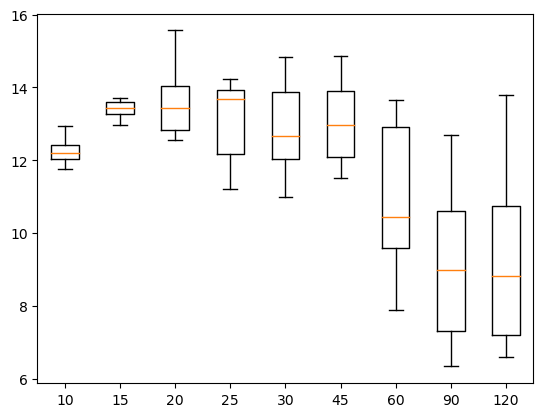

In [321]:
fig, ax = plt.subplots()
VP = ax.boxplot(x=asd[1][1].iloc[:,3:].T.to_numpy(), 
                labels=[10, 15, 20, 25, 30, 45, 60, 90, 120],
                
                
                
                )

plt.show()